In [59]:
library(ggplot2)

In [60]:
#### Sara's files
mydir = "/share/ScratchGeneral/anncuo/OneK1K/Saras_files/"

In [61]:
in_seurat_file = paste0(mydir,"cell_type.RDS")
in_indiv_phen_file = paste0(mydir,"phen.RDS")
in_meta_file = paste0(mydir,"metadata.Rdata")

In [62]:
# Read in seurat object and individual metadata 
obj   <- readRDS(in_seurat_file)
phens <- readRDS(in_indiv_phen_file)
load(in_meta_file) 
obj@meta.data = metadata 

In [63]:
obj

An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [64]:
head(obj@meta.data,2)

orig.ident nCount_RNA nFeature_RNA pool   individual
AAACCTGAGAATGTTG-1 onek1k     4754       1201         pool_1 691_692   
AAACCTGAGAGAACAG-1 onek1k     2459        896         pool_1 693_694   
                   percent.mt latent nCount_SCT nFeature_SCT cell_type         
AAACCTGAGAATGTTG-1 1.451409   b1     3226       1186         CD4+ KLRB1+ T cell
AAACCTGAGAGAACAG-1 3.700691   b1     2710        896         XCL1- NK          
                   ⋯ age sex predicted.celltype predicted.celltype.l3
AAACCTGAGAATGTTG-1 ⋯ 66  1   CD4+ KLRB1+ T cell CD4 TEM              
AAACCTGAGAGAACAG-1 ⋯ 88  2   XCL1- NK           NK                   
                   predicted.celltype.l4 predicted.celltype.l5
AAACCTGAGAATGTTG-1 CD4 T                 T cell               
AAACCTGAGAGAACAG-1 NK cell               NK cell              
                   predicted.celltype.l6 G2M.Score   S.Score      Phase
AAACCTGAGAATGTTG-1 Lymphoid              -0.02439549  0.008654699 S    
AAACCTGAGAGAACAG-1 Lymphoid              -0.02651399 -0.015410997 G1

In [65]:
umap_df = as.data.frame(Embeddings(obj, reduction = "umap"))
dim(umap_df)
head(umap_df)

[1] 1272489       2

UMAP_1     UMAP_2   
AAACCTGAGAATGTTG-1 -1.3250431 -4.065017
AAACCTGAGAGAACAG-1 -2.1187532 13.364066
AAACCTGAGCATGGCA-1  5.2636104 -2.043657
AAACCTGAGTATTGGA-1  2.9235904  4.613274
AAACCTGAGTGTCCCG-1  0.9407235  6.925539
AAACCTGCAAATTGCC-1 -2.7601063 -6.454456

In [66]:
umap_meta = as.data.frame(cbind(umap_df, obj@meta.data))
head(umap_meta,2)

UMAP_1    UMAP_2    orig.ident nCount_RNA nFeature_RNA
AAACCTGAGAATGTTG-1 -1.325043 -4.065017 onek1k     4754       1201        
AAACCTGAGAGAACAG-1 -2.118753 13.364066 onek1k     2459        896        
                   pool   individual percent.mt latent nCount_SCT ⋯ age sex
AAACCTGAGAATGTTG-1 pool_1 691_692    1.451409   b1     3226       ⋯ 66  1  
AAACCTGAGAGAACAG-1 pool_1 693_694    3.700691   b1     2710       ⋯ 88  2  
                   predicted.celltype predicted.celltype.l3
AAACCTGAGAATGTTG-1 CD4+ KLRB1+ T cell CD4 TEM              
AAACCTGAGAGAACAG-1 XCL1- NK           NK                   
                   predicted.celltype.l4 predicted.celltype.l5
AAACCTGAGAATGTTG-1 CD4 T                 T cell               
AAACCTGAGAGAACAG-1 NK cell               NK cell              
                   predicted.celltype.l6 G2M.Score   S.Score      Phase
AAACCTGAGAATGTTG-1 Lymphoid              -0.02439549  0.008654699 S    
AAACCTGAGAGAACAG-1 Lymphoid              -0.02651399 -0.015410997 G1

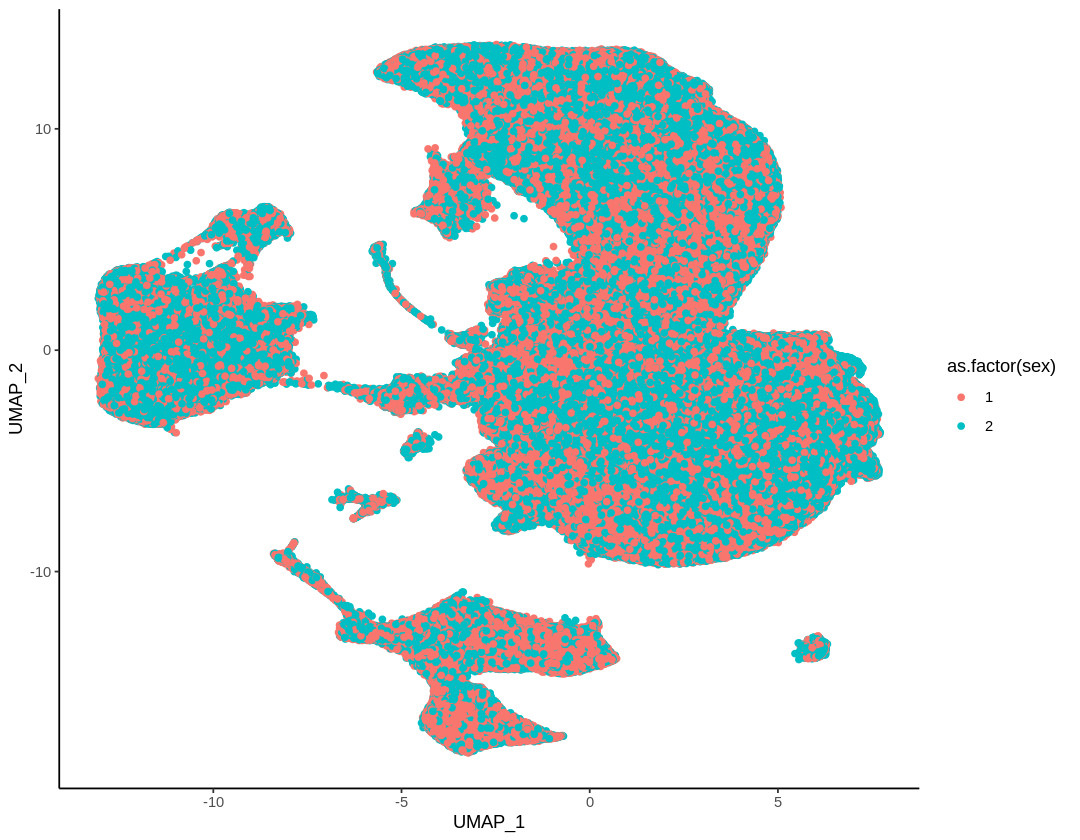

In [67]:
p = ggplot(umap_meta, aes(x=UMAP_1, y=UMAP_2, colour = as.factor(sex))) + geom_point() + theme_classic()
p

In [68]:
male_col = "#F7A51D"
female_col = "#671D5B"

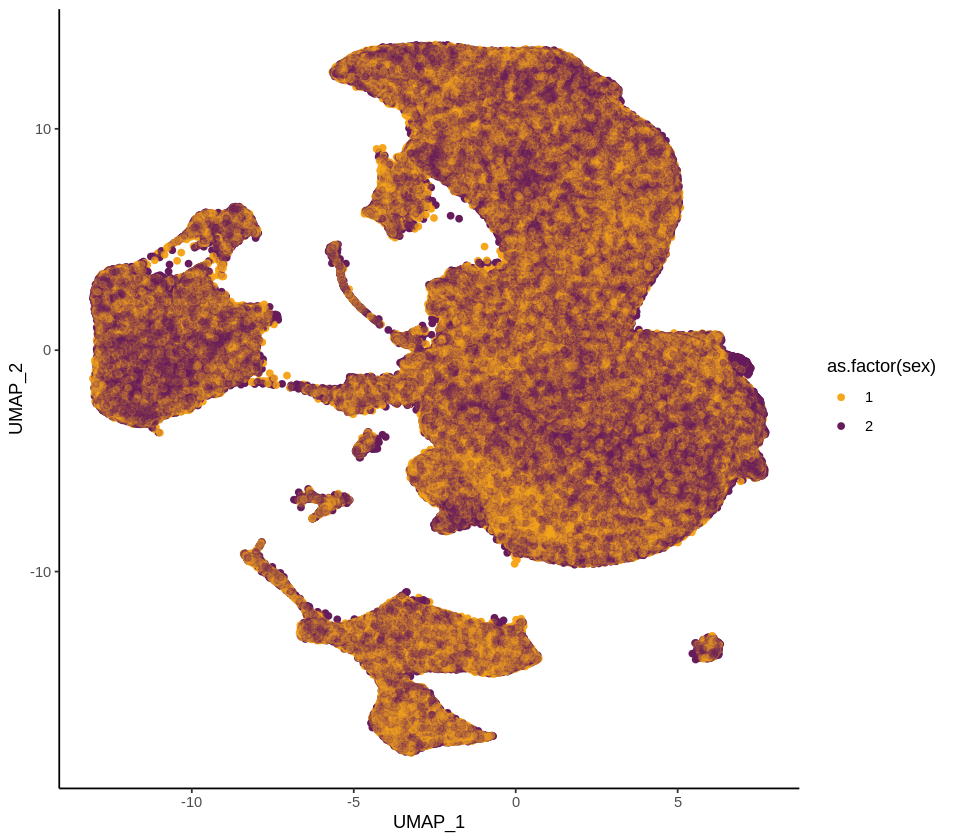

In [71]:
options(repr.plot.width = 8, repr.plot.height = 7)
p + scale_colour_manual(values = c(male_col,female_col)) + geom_point(alpha=0.2)

In [27]:
### use l3 celltype annotation
l3_celltypes = unique(obj@meta.data$predicted.celltype.l3)
l3_celltypes

[1] "CD4 TEM"           "NK"                "CD4 Naive"        
 [4] "CD8 TEM"           "B naive"           "CD8 TCM"          
 [7] "CD4 TCM"           "B intermediate"    NA                 
[10] "CD8 Naive"         "NK_CD56bright"     "B memory"         
[13] "CD16 Mono"         "MAIT"              "Treg"             
[16] "CD14 Mono"         "dnT"               "Eryth"            
[19] "NK Proliferating"  "CD4 CTL"           "HSPC"             
[22] "Platelet"          "Plasmablast"       "ILC"              
[25] "gdT"               "DC"                "CD4 Proliferating"
[28] "CD8 Proliferating" "Doublet"

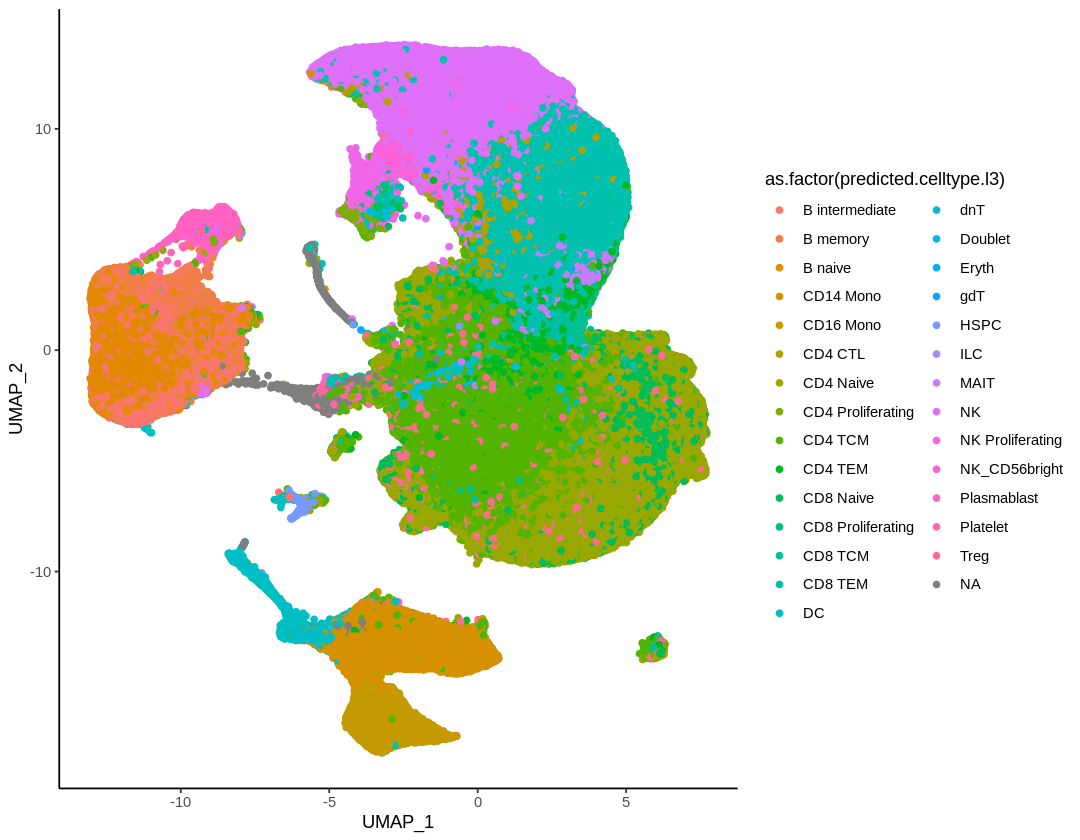

In [37]:
options(repr.plot.width = 9, repr.plot.height = 7)
p = ggplot(umap_meta, aes(x=UMAP_1, y=UMAP_2, colour = as.factor(predicted.celltype.l3))) + geom_point() + theme_classic()
p

Warning message:
“Removed 4721 rows containing missing values (geom_point).”
Warning message:
“Removed 4721 rows containing missing values (geom_point).”


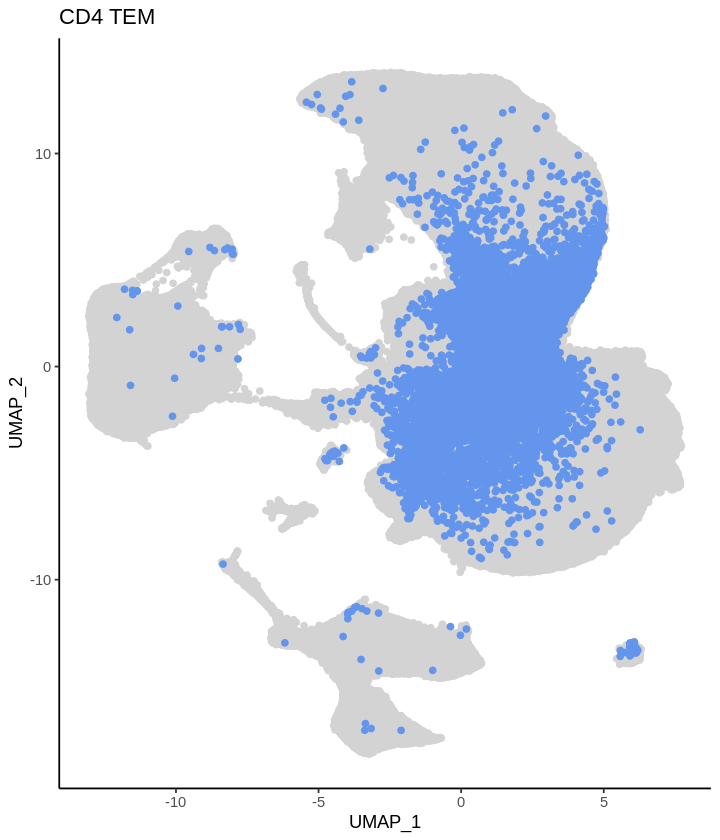

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


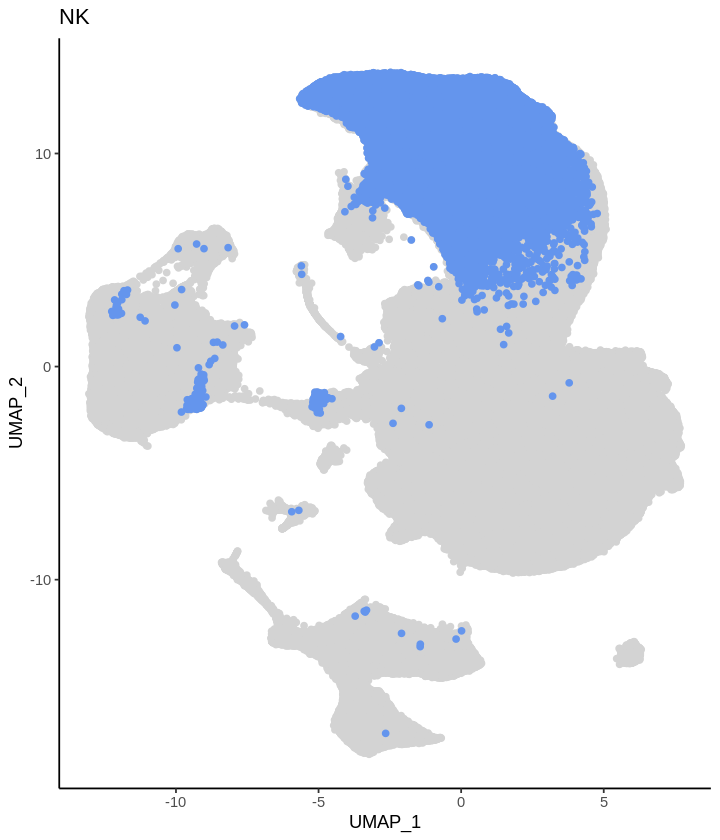

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


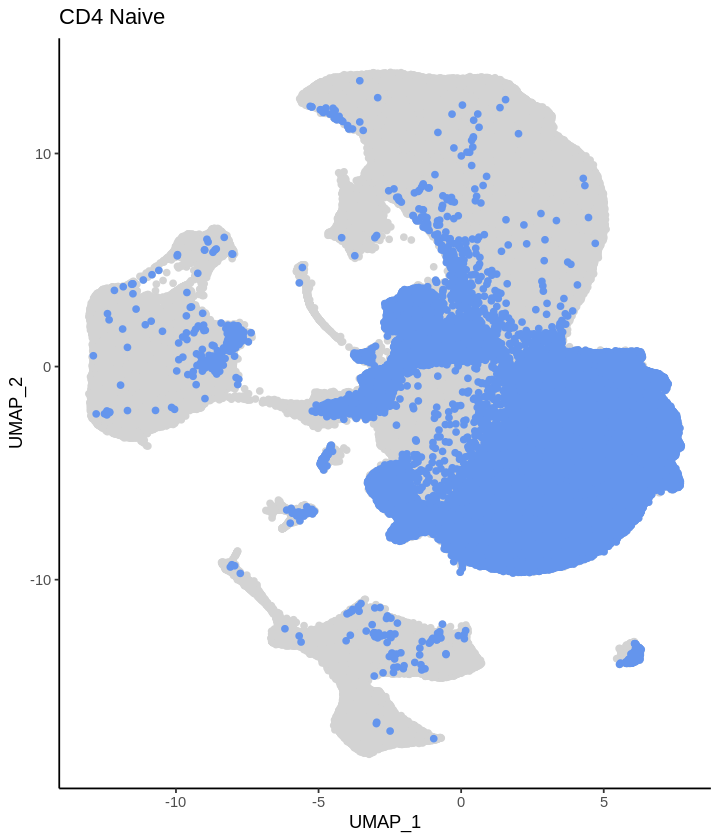

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


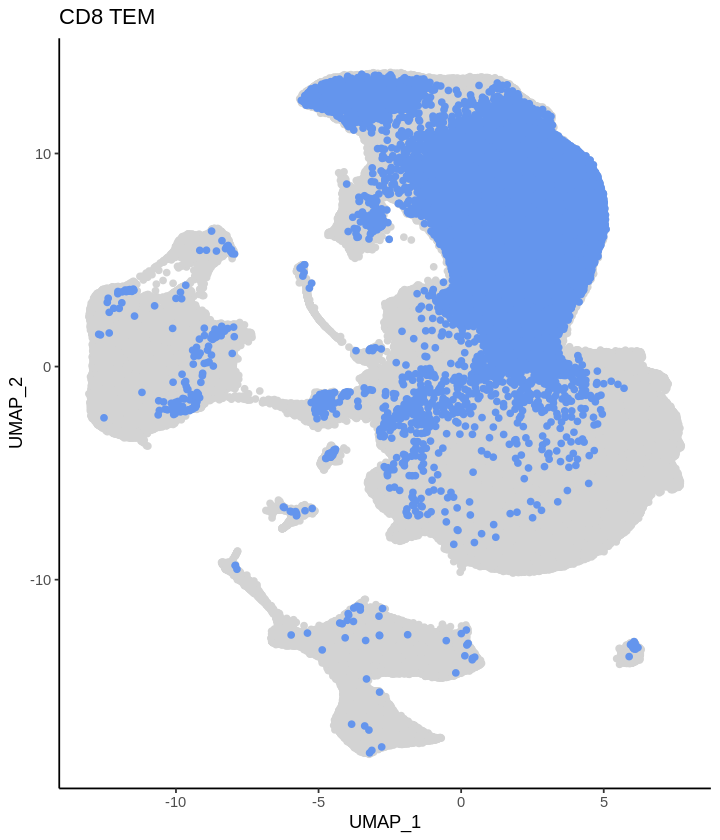

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


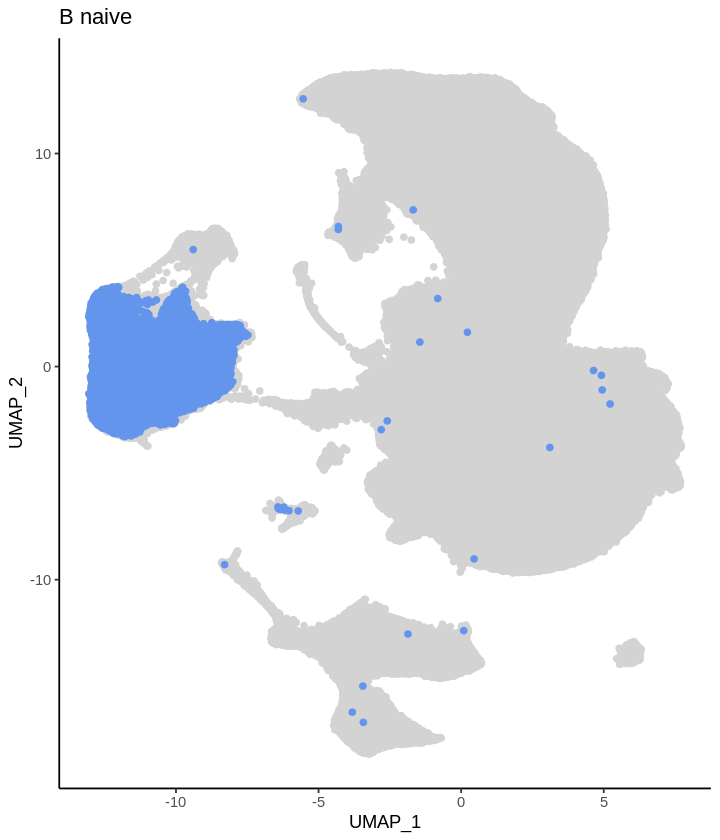

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


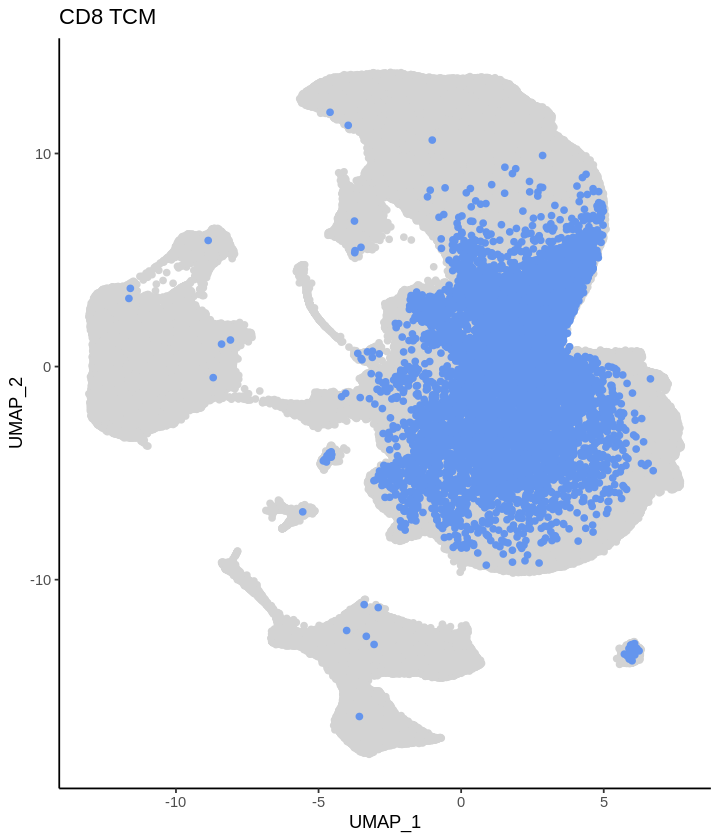

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


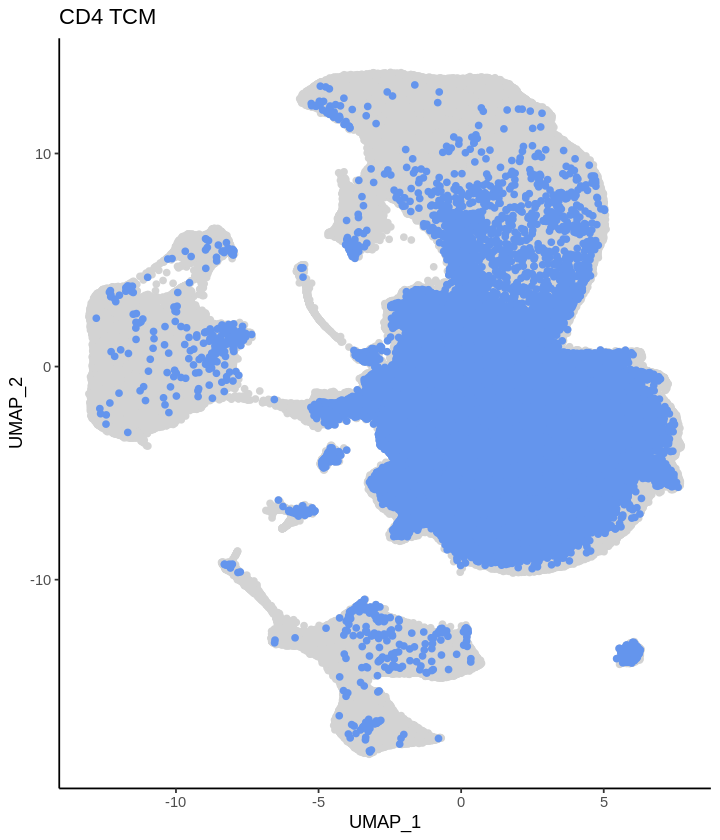

Warning message:
“Removed 1272489 rows containing missing values (geom_point).”


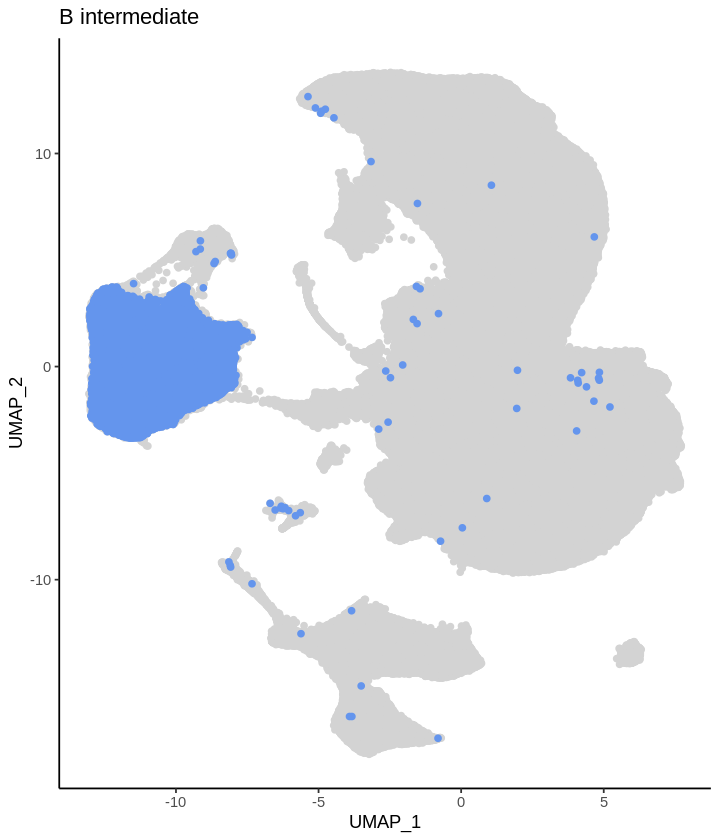

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


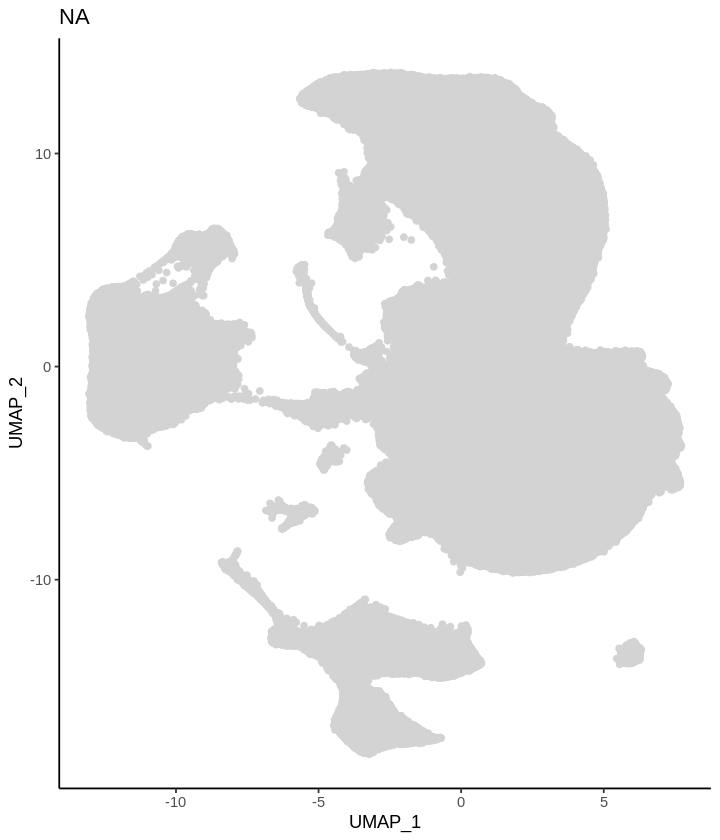

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


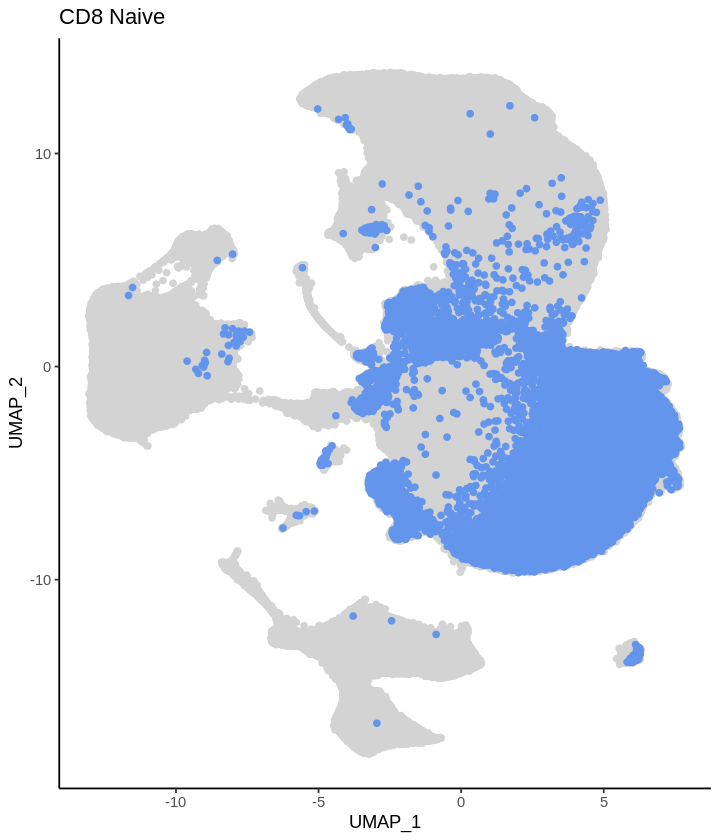

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


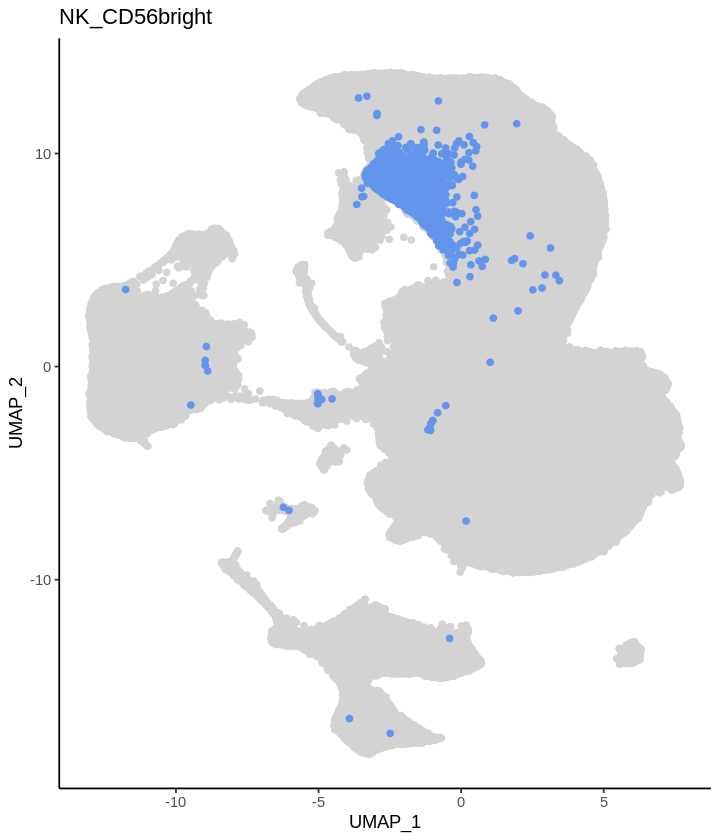

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


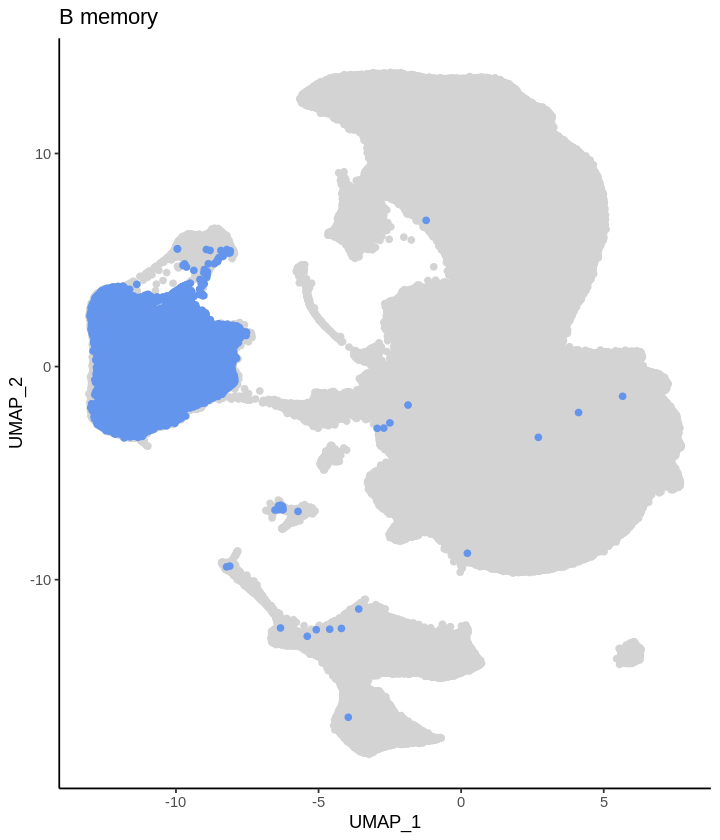

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


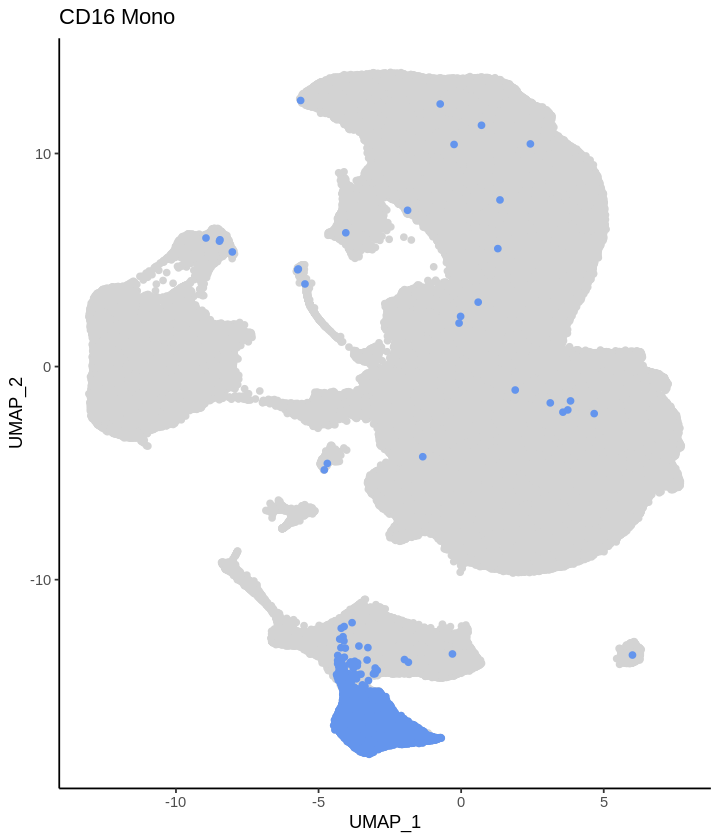

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


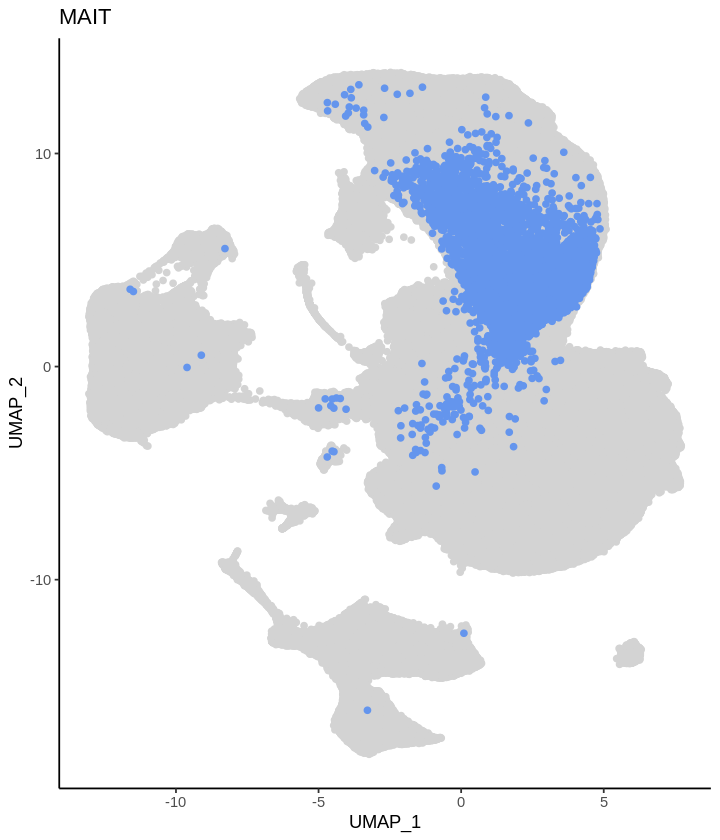

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


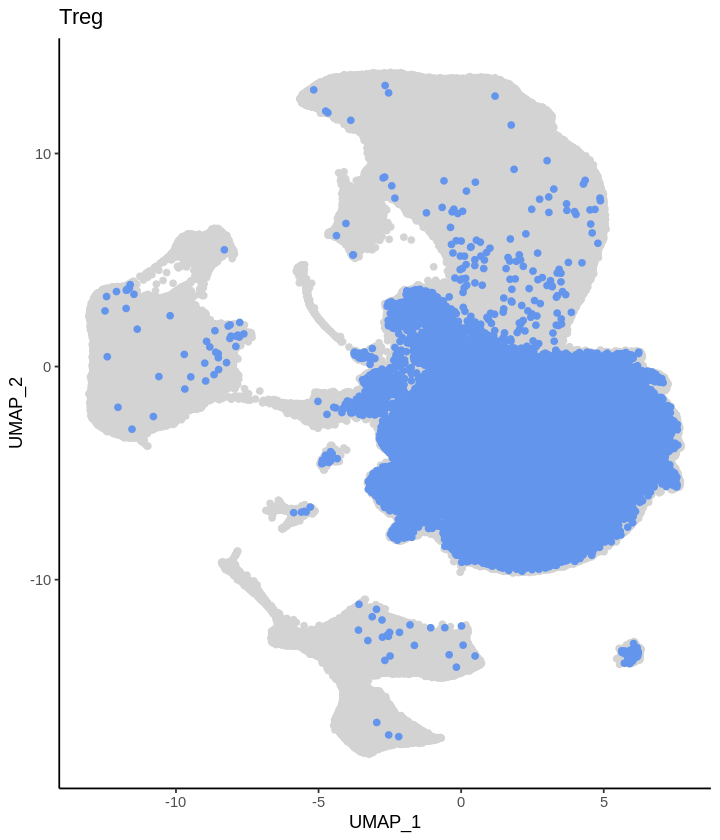

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


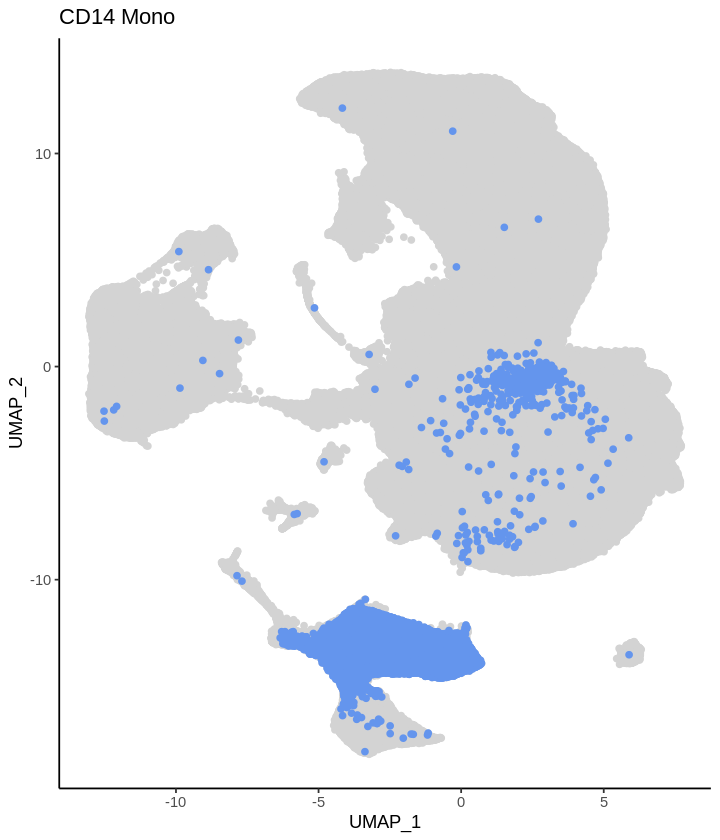

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


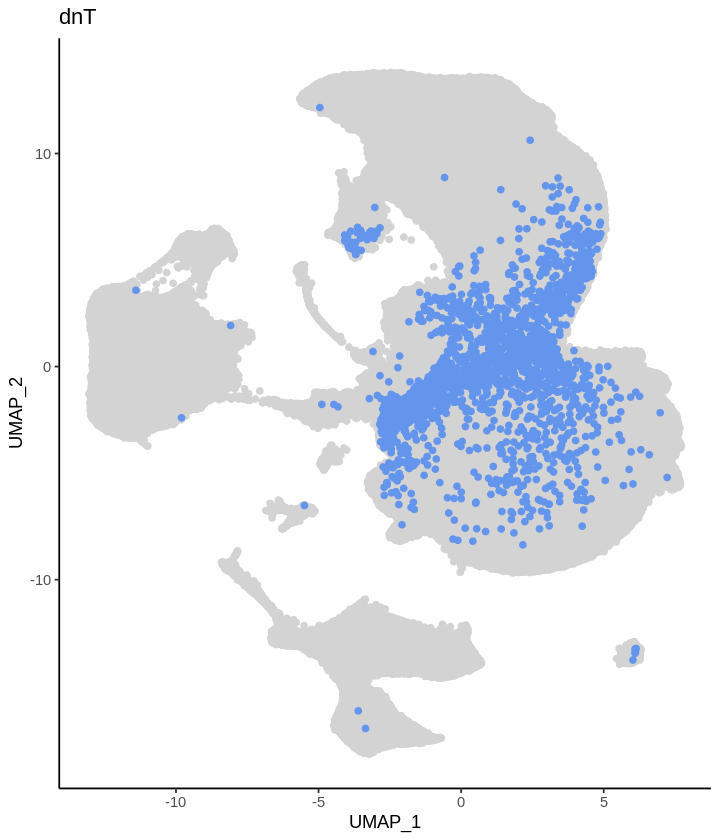

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


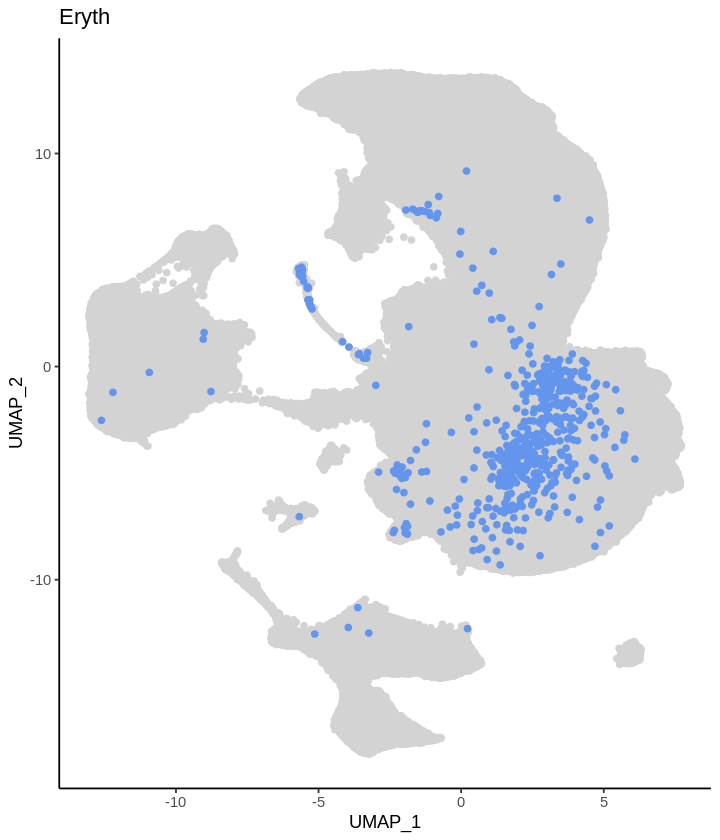

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


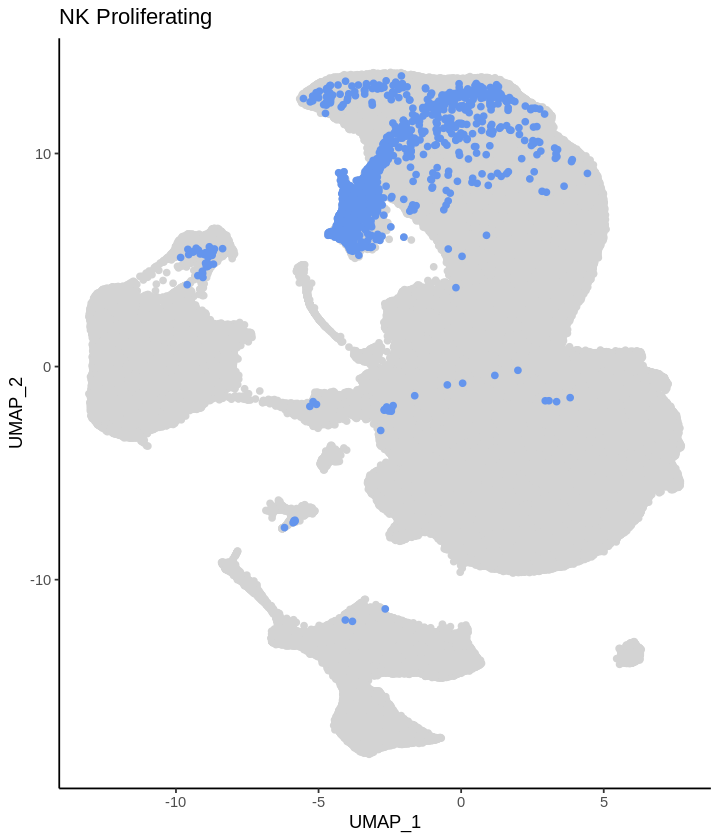

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


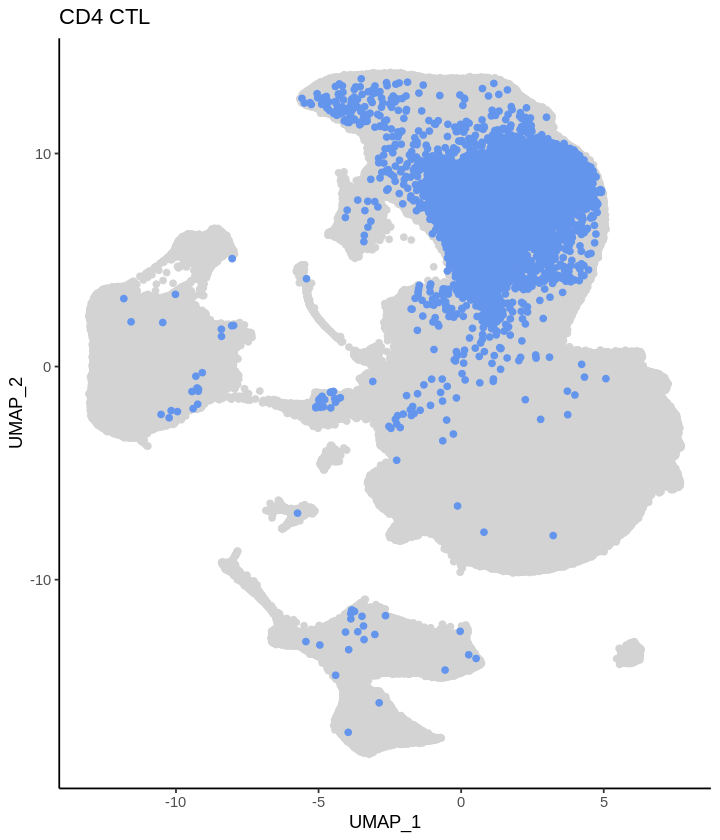

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


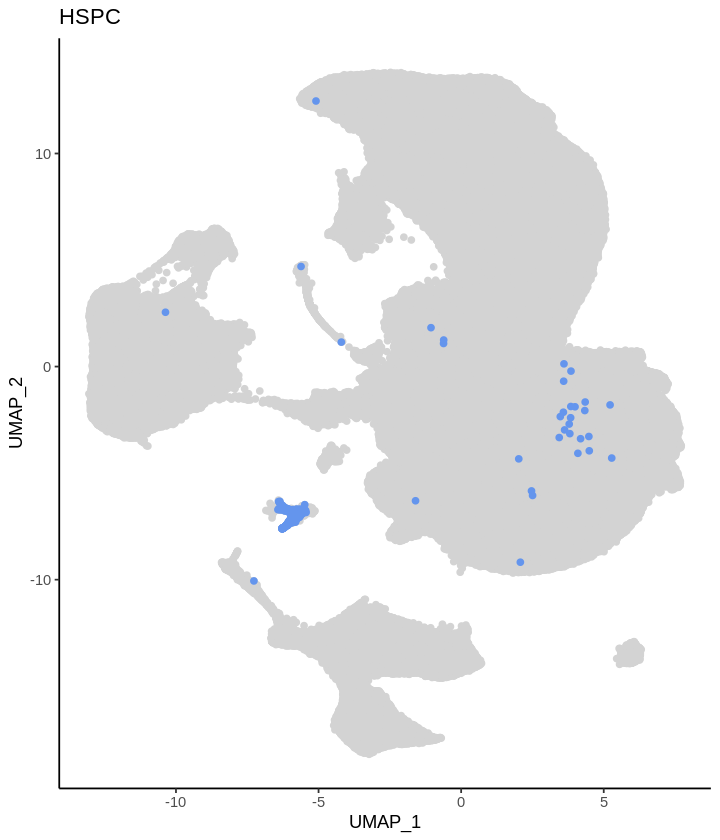

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


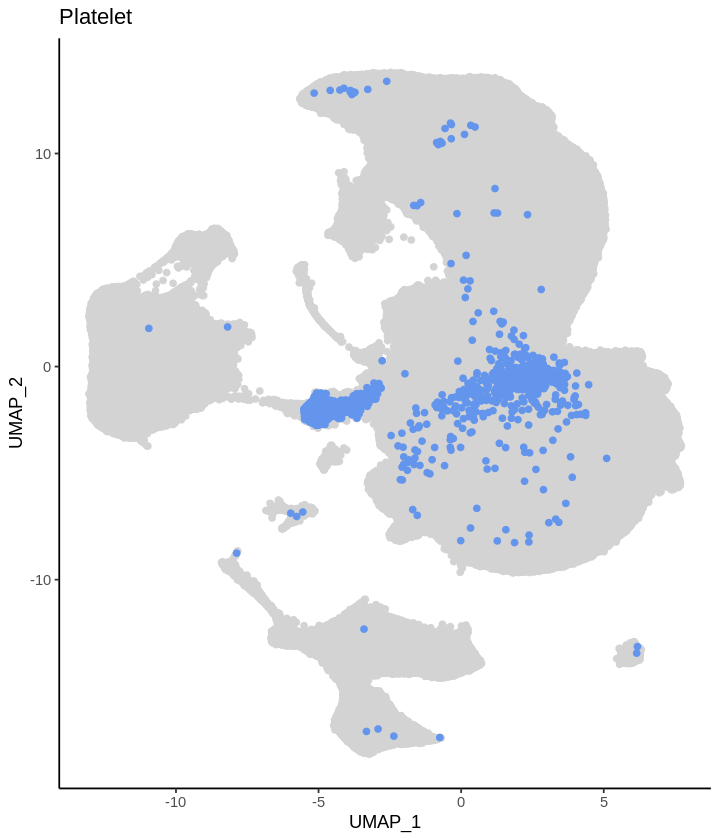

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


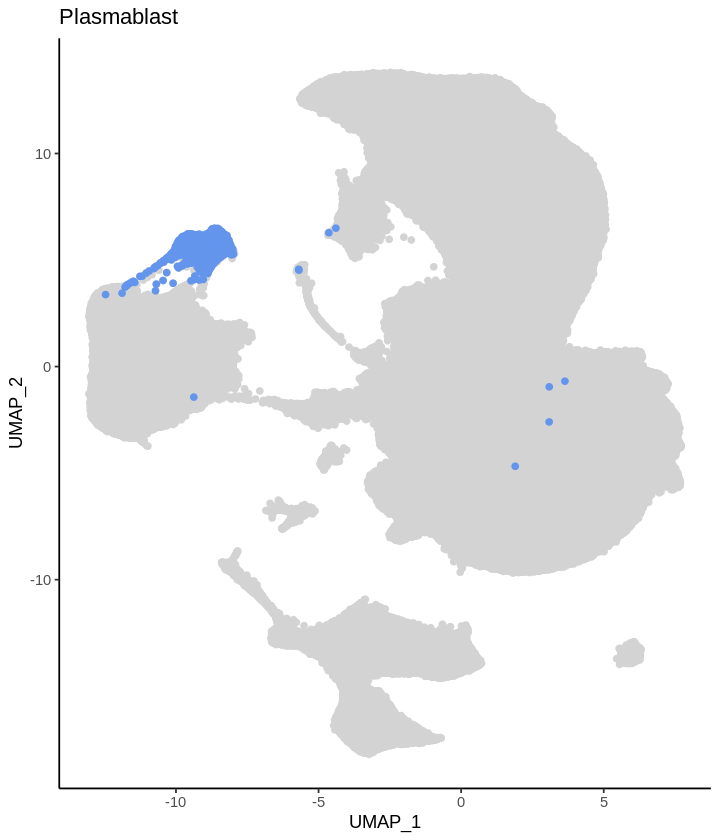

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


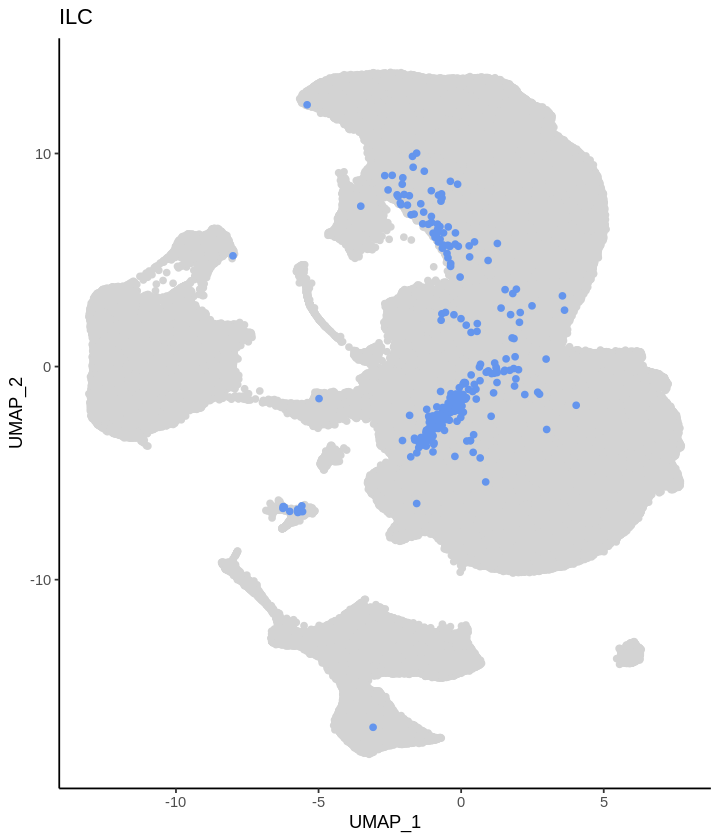

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


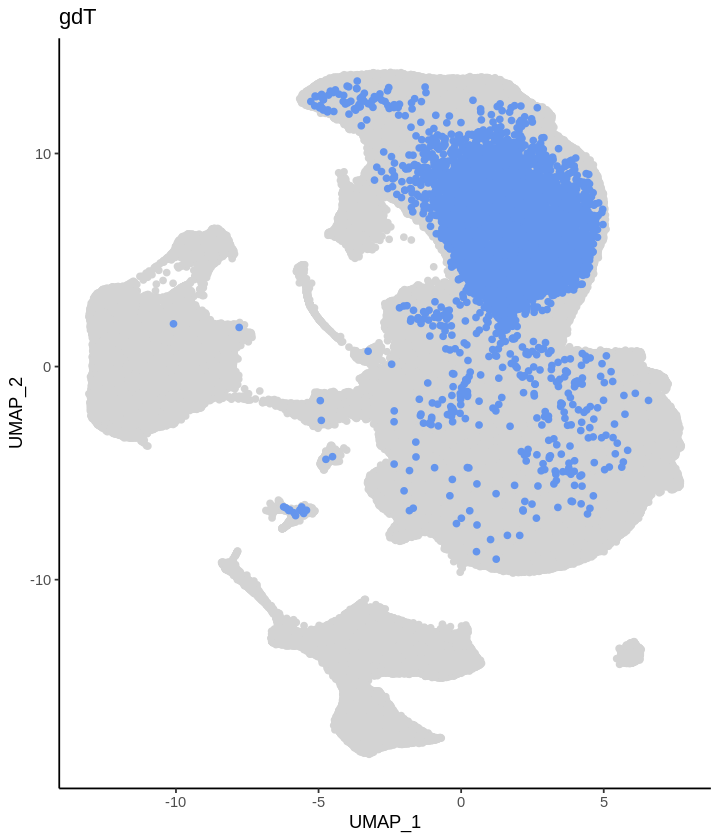

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


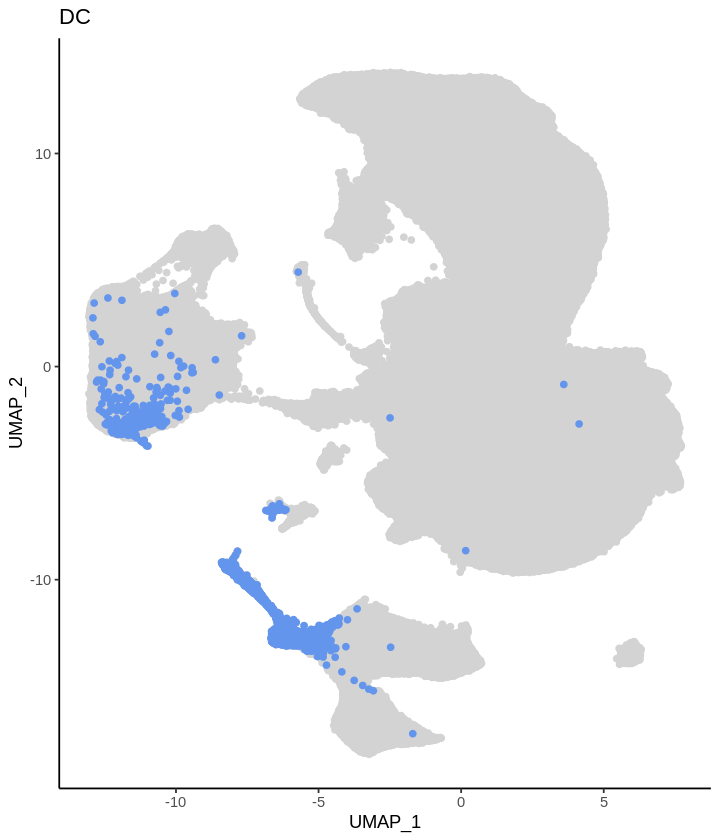

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


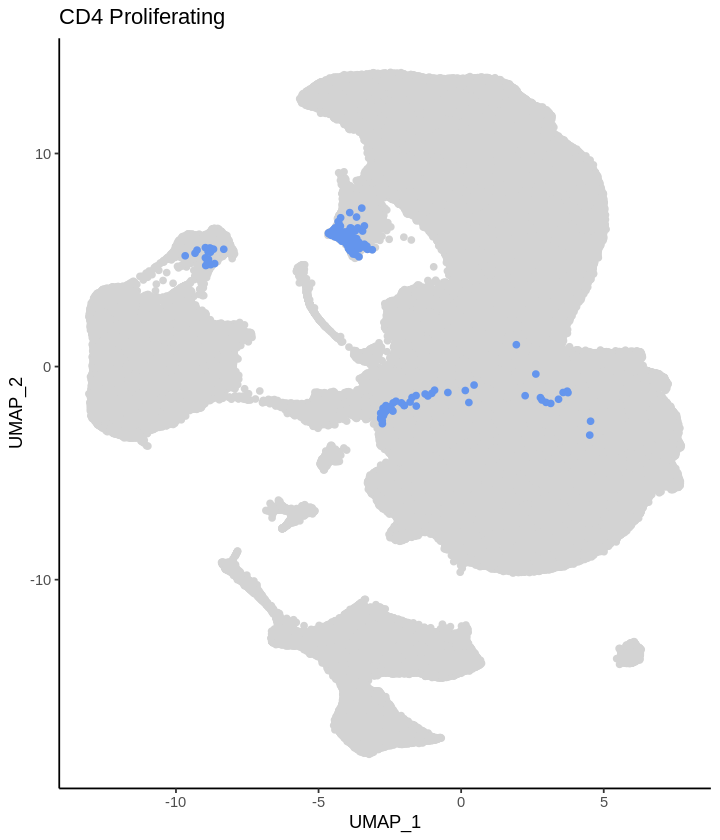

Warning message:
“Removed 4721 rows containing missing values (geom_point).”


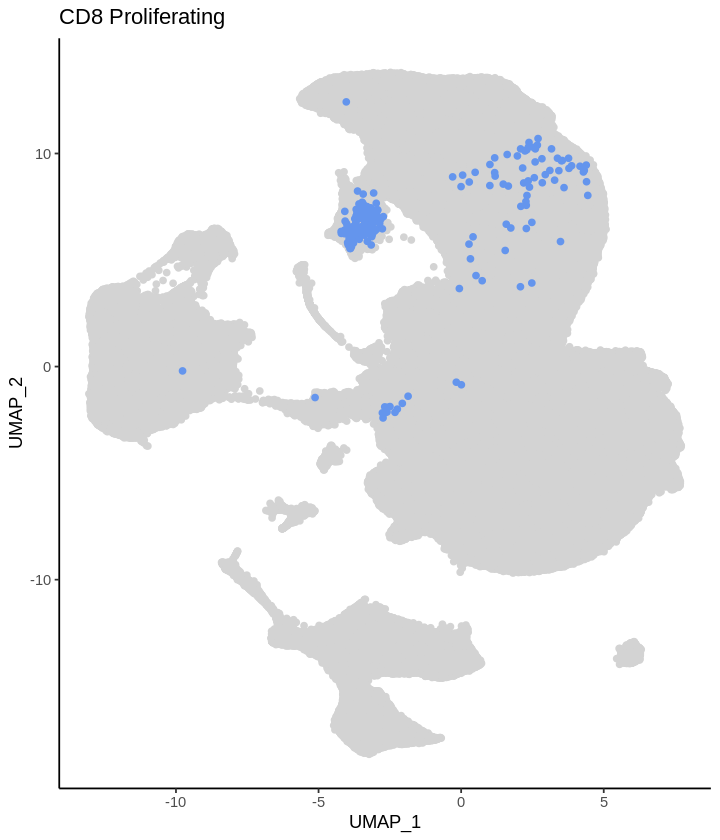

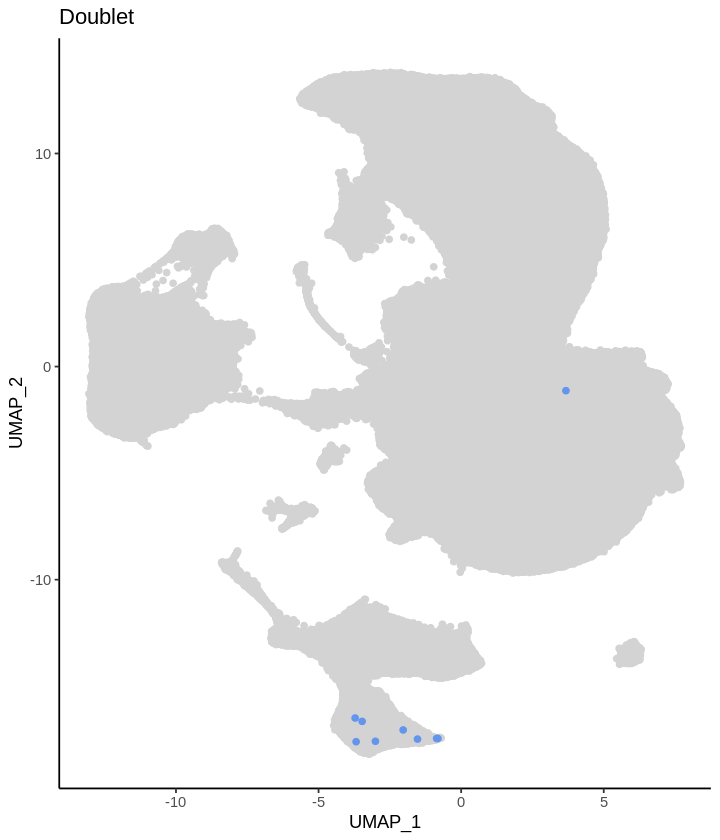

In [29]:
options(repr.plot.width = 6, repr.plot.height = 7)
for (celltype in l3_celltypes){
    p1 = ggplot(umap_meta, aes(x=UMAP_1, y=UMAP_2)) + geom_point(col="lightgrey") + theme_classic()
    p1 = p1 + geom_point(aes(x=UMAP_1, y=UMAP_2), colour="cornflowerblue", 
                       data = umap_meta[umap_meta$predicted.celltype.l3==celltype,])
    print(p1 + ggtitle(celltype))
}

In [57]:
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
df_codes = read.csv(paste0(mydir,"color_codes.csv"))
# head(df_codes)
df_colours = df_codes[,c("L2..DC.merged.","Color.1")]
colnames(df_colours) = c("cell_type","colours")
df_colours = df_colours[order(df_colours$cell_type),]
df_colours

cell_type         colours
1  B intermediate    #E7E643
2  B memory          #E3C033
3  B naive           #D4BA4D
22 CD14 Mono         #D27728
23 CD16 Mono         #C14327
5  CD4 CTL           #561647
6  CD4 Naive         #6B3360
7  CD4 Proliferating #805179
8  CD4 TCM           #966F93
9  CD4 TEM           #AB8DAC
11 CD8 Naive         #214A89
12 CD8 Proliferating #3B619C
13 CD8 TCM           #5579AF
14 CD8 TEM           #7092C3
24 DC                #AD1F23
15 dnT               #6FAFBF
28 Doublet           #49029E
25 Eryth             #0D0887
16 gdT               #64B0A1
26 HSPC              #1C068C
18 ILC               #2CAB84
17 MAIT              #59B183
19 NK                #429948
20 NK Proliferating  #5FA75B
21 NK_CD56bright     #7CB56F
4  Plasmablast       #BBD490
27 Platelet          #3A0398
10 Treg              #C1ABC6
29 NA                #5801A4

In [55]:
# mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
# df_colours = read.csv(paste0(mydir,"celltype_colours.csv"), row.names=1)
# head(df_colours)

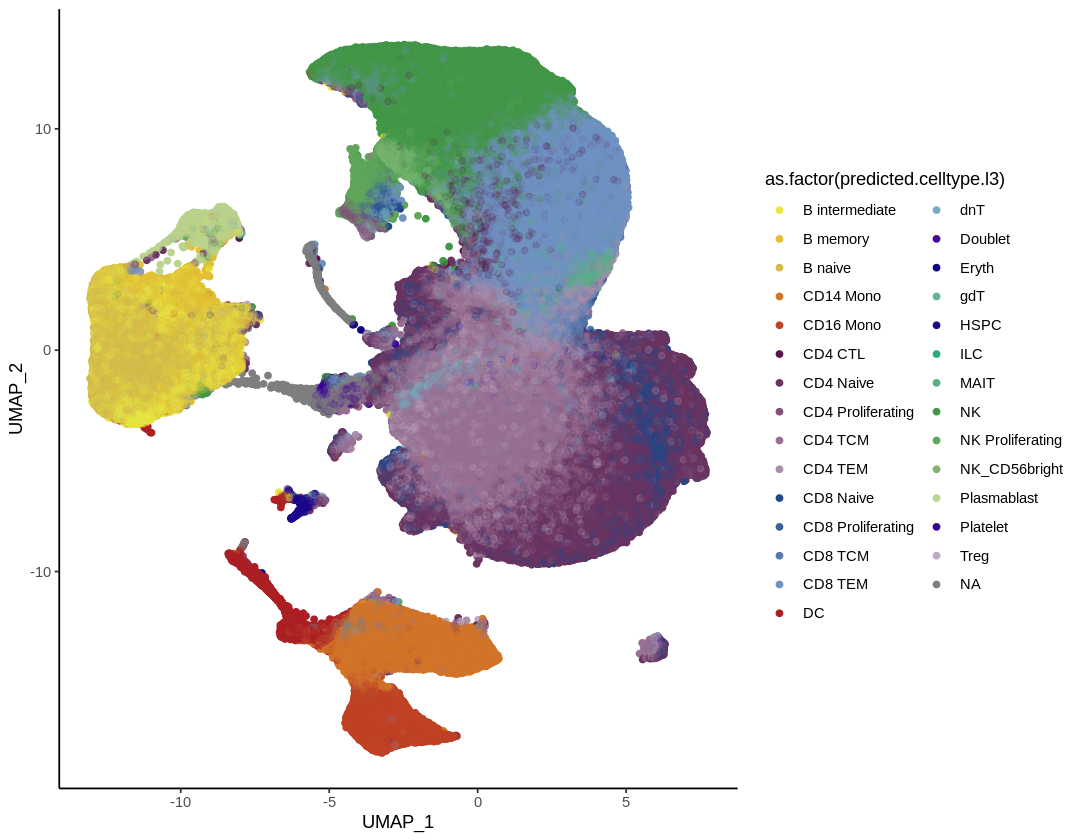

In [58]:
p + scale_colour_manual(values = df_colours$colours) + geom_point(alpha=0.2)